<a href="https://colab.research.google.com/github/GDS2002/DE-Sprint-5/blob/main/Sprint4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import classification_report, f1_score, accuracy_score, roc_auc_score

In [9]:
df_train = pd.read_csv('./data/application_data.csv')

In [10]:
df_train = df_train.sample(100_000)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 28002 to 236175
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 93.8+ MB


In [12]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
28002,132550,0,Cash loans,F,N,N,0,85500.0,540000.0,17550.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
267199,409586,0,Cash loans,F,N,Y,0,157500.0,161730.0,11632.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
189982,320281,0,Cash loans,F,Y,Y,1,202500.0,509922.0,31194.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
154373,278918,0,Cash loans,M,N,N,0,360000.0,1042560.0,40572.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
125349,245365,0,Cash loans,F,N,N,2,315000.0,389844.0,20034.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [13]:
df_train_isna_percentage = round(df_train.isnull().sum()*100/len(df_train.index),1)
df_train_isna_percentage = df_train_isna_percentage[df_train_isna_percentage.values > 50.0]
df_train = df_train.drop(columns = df_train_isna_percentage.index)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 28002 to 236175
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    100000 non-null  int64  
 1   TARGET                        100000 non-null  int64  
 2   NAME_CONTRACT_TYPE            100000 non-null  object 
 3   CODE_GENDER                   100000 non-null  object 
 4   FLAG_OWN_CAR                  100000 non-null  object 
 5   FLAG_OWN_REALTY               100000 non-null  object 
 6   CNT_CHILDREN                  100000 non-null  int64  
 7   AMT_INCOME_TOTAL              100000 non-null  float64
 8   AMT_CREDIT                    100000 non-null  float64
 9   AMT_ANNUITY                   99996 non-null   float64
 10  AMT_GOODS_PRICE               99908 non-null   float64
 11  NAME_TYPE_SUITE               99579 non-null   object 
 12  NAME_INCOME_TYPE              100000 non

In [14]:
median_columns = list(df_train.isna().sum().index)
df_train[median_columns] = df_train[median_columns].fillna(df_train[median_columns].median())
df_train.info()

<ipython-input-14-14eeb3ac1762>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train[median_columns] = df_train[median_columns].fillna(df_train[median_columns].median())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 28002 to 236175
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    100000 non-null  int64  
 1   TARGET                        100000 non-null  int64  
 2   NAME_CONTRACT_TYPE            100000 non-null  object 
 3   CODE_GENDER                   100000 non-null  object 
 4   FLAG_OWN_CAR                  100000 non-null  object 
 5   FLAG_OWN_REALTY               100000 non-null  object 
 6   CNT_CHILDREN                  100000 non-null  int64  
 7   AMT_INCOME_TOTAL              100000 non-null  float64
 8   AMT_CREDIT                    100000 non-null  float64
 9   AMT_ANNUITY                   100000 non-null  float64
 10  AMT_GOODS_PRICE               100000 non-null  float64
 11  NAME_TYPE_SUITE               99579 non-null   object 
 12  NAME_INCOME_TYPE              100000 non

In [15]:
object_columns = list(df_train.select_dtypes(include=['object']).columns)

df_object_columns = df_train.loc[:,object_columns]
d = df_object_columns.isna().sum() 
list(d[d.values != 0].index)

['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE']

In [16]:
df_train['NAME_TYPE_SUITE'] = df_train['NAME_TYPE_SUITE'].fillna(df_train['NAME_TYPE_SUITE'].mode()[0])
df_train['OCCUPATION_TYPE'] = df_train['OCCUPATION_TYPE'].fillna(df_train['OCCUPATION_TYPE'].mode()[0])
df_train['EMERGENCYSTATE_MODE'] = df_train['EMERGENCYSTATE_MODE'].fillna(df_train['EMERGENCYSTATE_MODE'].mode()[0])

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 28002 to 236175
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    100000 non-null  int64  
 1   TARGET                        100000 non-null  int64  
 2   NAME_CONTRACT_TYPE            100000 non-null  object 
 3   CODE_GENDER                   100000 non-null  object 
 4   FLAG_OWN_CAR                  100000 non-null  object 
 5   FLAG_OWN_REALTY               100000 non-null  object 
 6   CNT_CHILDREN                  100000 non-null  int64  
 7   AMT_INCOME_TOTAL              100000 non-null  float64
 8   AMT_CREDIT                    100000 non-null  float64
 9   AMT_ANNUITY                   100000 non-null  float64
 10  AMT_GOODS_PRICE               100000 non-null  float64
 11  NAME_TYPE_SUITE               100000 non-null  object 
 12  NAME_INCOME_TYPE              100000 non

In [18]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_Yes
28002,132550,0,0,85500.0,540000.0,17550.0,540000.0,0.022800,-9541,-124,...,0,0,0,0,0,0,0,0,0,0
267199,409586,0,0,157500.0,161730.0,11632.5,135000.0,0.007114,-15348,-2414,...,0,0,0,0,0,0,0,0,0,0
189982,320281,0,1,202500.0,509922.0,31194.0,472500.0,0.018634,-19340,-2905,...,0,0,0,0,0,0,0,0,0,0
154373,278918,0,0,360000.0,1042560.0,40572.0,900000.0,0.072508,-11465,-1625,...,0,0,0,0,0,0,0,0,0,0
125349,245365,0,2,315000.0,389844.0,20034.0,315000.0,0.016612,-15341,-5215,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X = df_train.drop(columns = ['TARGET'])
y = df_train['TARGET']

X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.20, random_state=111222, stratify=y)

X_train.shape, X_valid.shape

((80000, 179), (20000, 179))

In [20]:
importances = mutual_info_classif(X_train, y_train)
feature_importances = pd.Series(importances, X_train.columns[0:len(X_train.columns)])

important_feature = feature_importances[feature_importances.values > 0.01]
drop_feature = feature_importances[feature_importances.values <= 0.01]

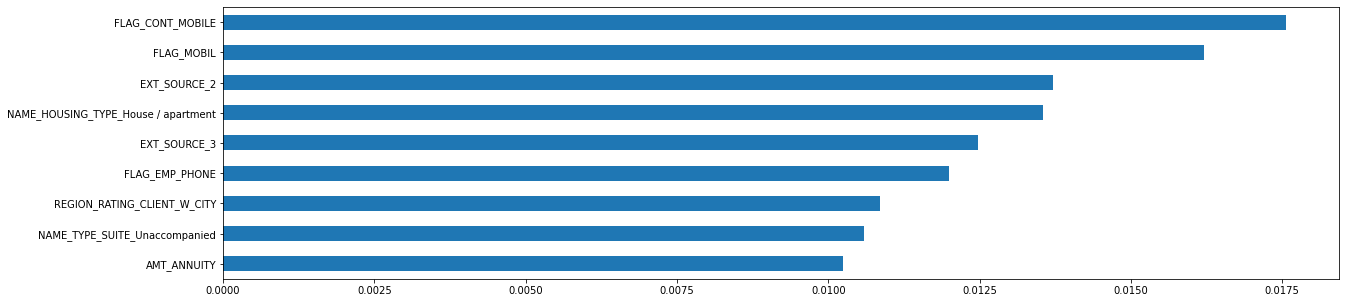

In [21]:
plt.figure(figsize=(20,5))
important_feature.sort_values().plot(kind='barh')
plt.show()

In [22]:
len(X_train.columns), len(drop_feature.index)

(179, 170)

In [23]:
X_train = X_train.drop(columns = drop_feature.index)
X_valid = X_valid.drop(columns = drop_feature.index)
len(X_train.columns)

9

In [24]:
numeric = list(X_train.columns)

scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_train.sample(10)

,AMT_ANNUITY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,NAME_TYPE_SUITE_Unaccompanied,NAME_HOUSING_TYPE_House / apartment
41136,-0.151836,0.003536,0.468442,0.042612,-0.061673,0.539234,-0.221954,0.479892,-2.800484
268672,0.614367,0.003536,0.468442,0.042612,1.922969,-1.809487,0.107687,0.479892,0.357081
205424,-0.314673,0.003536,0.468442,0.042612,-0.061673,0.696456,0.107687,0.479892,0.357081
60037,0.514993,0.003536,0.468442,0.042612,-0.061673,-1.851444,0.599343,0.479892,0.357081
150749,-1.483325,0.003536,-2.134736,0.042612,-0.061673,-0.693972,0.107687,-2.083804,0.357081
52249,-0.193628,0.003536,0.468442,0.042612,-0.061673,-0.954430,-0.814733,0.479892,0.357081
302596,0.154026,0.003536,0.468442,0.042612,-0.061673,-0.856072,-0.436985,0.479892,0.357081
72277,-0.237279,0.003536,0.468442,0.042612,1.922969,-1.683196,0.954241,0.479892,-2.800484
39697,-0.790802,0.003536,0.468442,0.042612,-0.061673,0.560018,0.107687,0.479892,0.357081
16485,1.750204,0.003536,0.468442,0.042612,1.922969,-0.126724,0.107687,0.479892,0.357081


In [25]:
X_train_embedded = TSNE(n_components=2, learning_rate = 'auto', n_jobs = -1).fit_transform(X_train[:10000])
X_train_embedded.shape

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(10000, 2)

In [26]:
X_train_embedded[:, 0].shape, X_train_embedded[:, 1].shape, y_train[:10000].shape

((10000,), (10000,), (10000,))

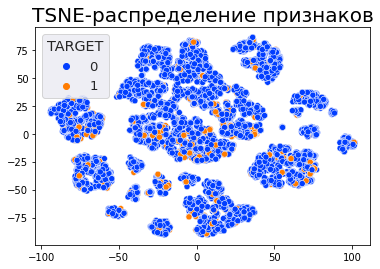

In [27]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize': (15, 8)}, font_scale=1.2, style='darkgrid')
sns.scatterplot(x = X_train_embedded[:, 0], y = X_train_embedded[:, 1], hue=y_train[:10000], palette='bright')
ax.set_title('TSNE-распределение признаков', fontsize=20)
plt.show()

In [28]:
random_state = 1

In [29]:
params = dict(
    C = [100, 10, 1, 0.1, 0.01, 0.001],
    penalty=['l1', 'l2', 'elasticnet'],
    solver=['saga'],
    multi_class =['auto', 'ovr', 'multinomial'],
    l1_ratio=[1]
)

In [30]:
lr = LogisticRegression()
lr = RandomizedSearchCV(lr, params, n_jobs=-1, cv=5, random_state=random_state)
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                                        'l1_ratio': [1],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['saga']},
                   random_state=1)

In [31]:
best_params = lr.best_params_
best_params

{'solver': 'saga',
 'penalty': 'l2',
 'multi_class': 'ovr',
 'l1_ratio': 1,
 'C': 0.1}

In [32]:
for X, y, label in zip([X_train, X_valid], [y_train, y_valid], ['train', 'test']):
  pred = lr.predict(X)
  f1 = f1_score(y, lr.predict(X), average='micro').round(3)
  
  print(f'Acc {label}={accuracy_score(y, pred):.3f}')  
  print(f'F1 {label}={f1}')
  print(f'ROC_AUC {label}={roc_auc_score(y, lr.predict_proba(X)[:, 1]):.3f}\n')

Acc train=0.918
F1 train=0.918
ROC_AUC train=0.707

Acc test=0.918
F1 test=0.918
ROC_AUC test=0.720



In [33]:
print(classification_report(y_train, lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73431
           1       0.58      0.00      0.00      6569

    accuracy                           0.92     80000
   macro avg       0.75      0.50      0.48     80000
weighted avg       0.89      0.92      0.88     80000



In [34]:
print(classification_report(y_valid, lr.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18358
           1       1.00      0.00      0.00      1642

    accuracy                           0.92     20000
   macro avg       0.96      0.50      0.48     20000
weighted avg       0.92      0.92      0.88     20000



In [35]:
params = dict(
    n_estimators = range(5, 150, 5),
    min_samples_split = range(1, 20, 2),
    min_samples_leaf = range(1, 20, 2),
    max_samples = np.linspace(0, 1, 20)
)

In [36]:
rf = RandomForestClassifier()
rf = RandomizedSearchCV(rf, params, n_jobs=-1, cv=5, random_state=random_state)
rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_samples': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                                        'min_samples_leaf': range(1, 20, 2),
                                        'min_samples_split': range(1, 20, 2),
                                        'n_estimators': range(5, 150, 5)},
                   random_state=1)

In [37]:
best_params = rf.best_params_
best_params

{'n_estimators': 110,
 'min_samples_split': 19,
 'min_samples_leaf': 3,
 'max_samples': 0.21052631578947367}

In [38]:
for X, y, label in zip([X_train, X_valid], [y_train, y_valid], ['train', 'test']):
  pred = rf.predict(X)
  f1 = f1_score(y, rf.predict(X), average='micro').round(3)
  
  print(f'Acc {label}={accuracy_score(y, pred):.3f}')  
  print(f'F1 {label}={f1}')
  print(f'ROC_AUC {label}={roc_auc_score(y, rf.predict_proba(X)[:, 1]):.3f}\n')

Acc train=0.918
F1 train=0.918
ROC_AUC train=0.859

Acc test=0.918
F1 test=0.918
ROC_AUC test=0.706



In [39]:
print(classification_report(y_train, rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73431
           1       0.79      0.01      0.02      6569

    accuracy                           0.92     80000
   macro avg       0.85      0.50      0.49     80000
weighted avg       0.91      0.92      0.88     80000



In [40]:
print(classification_report(y_valid, rf.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18358
           1       0.65      0.01      0.01      1642

    accuracy                           0.92     20000
   macro avg       0.78      0.50      0.49     20000
weighted avg       0.90      0.92      0.88     20000



In [41]:
params = dict(
    max_depth = [3, None],
    max_features = range(1, 9, 1),
    min_samples_leaf = range(1, 9, 1),
    criterion = ["gini", "entropy"]
)

In [42]:
dt = DecisionTreeClassifier()
dt = RandomizedSearchCV(dt, params, n_jobs=-1, cv=5, random_state=random_state)
dt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': range(1, 9),
                                        'min_samples_leaf': range(1, 9)},
                   random_state=1)

In [43]:
best_params = dt.best_params_
best_params

{'min_samples_leaf': 3, 'max_features': 5, 'max_depth': 3, 'criterion': 'gini'}

In [44]:
for X, y, label in zip([X_train, X_valid], [y_train, y_valid], ['train', 'test']):
  pred = dt.predict(X)
  f1 = f1_score(y, dt.predict(X), average='micro').round(3)
  
  print(f'Acc {label}={accuracy_score(y, pred):.3f}')  
  print(f'F1 {label}={f1}')
  print(f'ROC_AUC {label}={roc_auc_score(y, dt.predict_proba(X)[:, 1]):.3f}\n')

Acc train=0.918
F1 train=0.918
ROC_AUC train=0.660

Acc test=0.918
F1 test=0.918
ROC_AUC test=0.658



In [45]:
print(classification_report(y_train, dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73431
           1       0.00      0.00      0.00      6569

    accuracy                           0.92     80000
   macro avg       0.46      0.50      0.48     80000
weighted avg       0.84      0.92      0.88     80000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
print(classification_report(y_valid, dt.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18358
           1       0.00      0.00      0.00      1642

    accuracy                           0.92     20000
   macro avg       0.46      0.50      0.48     20000
weighted avg       0.84      0.92      0.88     20000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
